/home/Agda77/anaconda3/envs/course/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/Agda77/anaconda3/envs/course/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Output k = 2')

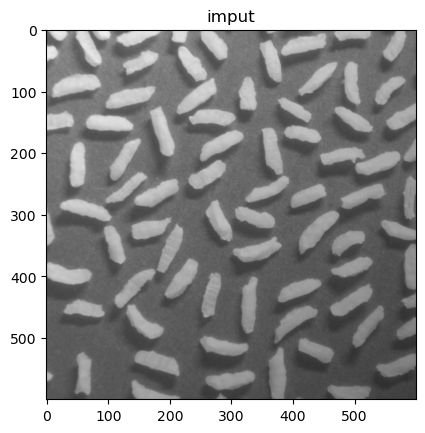

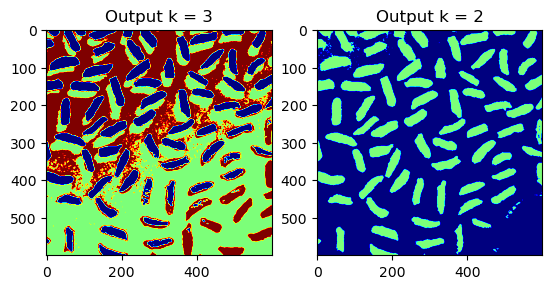

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io

from sklearn.cluster import k_means

x = np.float64(io.imread("granelli_riso.tif"))
plt.figure()
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("input")

# Ogni livello di grigio viene analizzato singolarmente
# quindi non ha l'esigenza di lavorare sulla matrice, quindi evita il contorno ed
# elabora il pixel singolarmente

# Riceve un vettore con tutti i valori della matrice

# -1 funge da jolly, che mi permette di linearizzare la matrice che mi permette di incolonnare tutti gli elementi
# della matrice su un vettore colonne M*N x 1
d = np.reshape(x, (-1,1))

K_1 = 3 # Numero di classi che devo discriminare
centroid, idx, sum_var = k_means(d, K_1)
y = np.reshape(idx, x.shape)

K_2 = 2
centroid, idx, sum_var = k_means(d, K_2)
z = np.reshape(idx, x.shape)

plt.figure()

plt.subplot(1,2,1)
# scegliamo un cmap colorato per vederlo meglio
plt.imshow(y, clim=[0,K_1-1], cmap="jet")
plt.title("Output k = " + str(K_1))

plt.subplot(1,2,2)
plt.imshow(z, clim=[0,K_2], cmap="jet")
plt.title("Output k = " + str(K_2))


/home/Agda77/anaconda3/envs/course/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: cannot reshape array of size 65536 into shape (256,256,3)

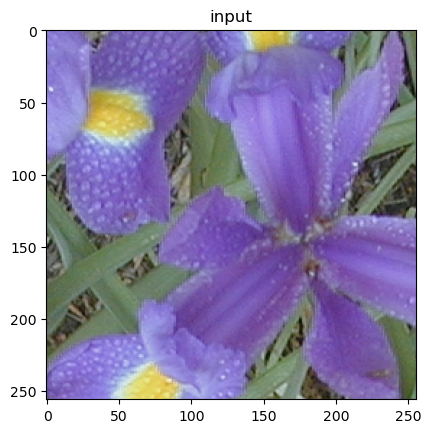

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io

from sklearn.cluster import k_means

x = np.float64(io.imread("Fiori256.bmp"))/255

plt.figure()
plt.imshow(x)
plt.title("input")

L = 3 # Identifica i livelli di colore considerati
d = np.reshape(x, (-1,L))

K_1 = 3 # Numero di classi che devo discriminare
centroid, idx, sum_var = k_means(d, K_1)
y = np.reshape(idx, x.shape)

plt.figure()
# scegliamo un cmap colorato per vederlo meglio
plt.imshow(y, clim=[0,K_1-1], cmap="jet")
plt.title("Output k = " + str(K_1))

### Morfologia Matematica

Insieme di strumenti per classificare le immagini binarie (che otteniamo tramite il trash holding), permette di manipolare la forma di uno specifico oggetto. 

Tutti gli operatori di morfologia si basano su un confronto locale tra un'immagine binaria ed una maschera binaria. Quindi si rientra in un operazione a finestra scorrevole, e quindi bisogna capire come si sceglie una finestra scorrevole fatta ad-hoc.
Elementi strutturanti:
la maschera binaria va scelta secondo lo specifico obbiettivo finale.

- Dilatazione: Dilata uno specifico oggetto in base ad un filtro binario ben definito. La dilatazione va a coprire i pixel isolati "spenti" all'interno di aree "accese". Quindi bisogna strutturare bene la "morfologia" del filtro locale da applicare
- Erosione: Si vanno ad enfatizzare ed attivare solo le zone dove tutto il flitro è immerso in un area uniforme

Molto spesso, l'erosione e l'espansione si utilizzano il maniera combinata in modo da poter ottenere immagini più accettabili. Si possono estrarre le porzioni di interesse all'interno dell'immagine (vedere l'opzione dei cerchi e delle stecchette)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io

from sklearn.cluster import k_means

x = np.float64(io.imread("Fiori256.bmp"))/255

plt.figure()
plt.imshow(x)
plt.title("input")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

b = np.array([[1,1,1]], np.bool)
y1 = morph.binary_dilation(x,b)
y2 = morph.binary_erosion(x,b)

print(y1)
print(y2)

/tmp/ipykernel_9125/2765795638.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.array([[1,1,1]], np.bool)


IndexError: tuple index out of range

/tmp/ipykernel_9125/3640400871.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.array([[0,1,0],[1,1,1],[0,1,0]], np.bool)


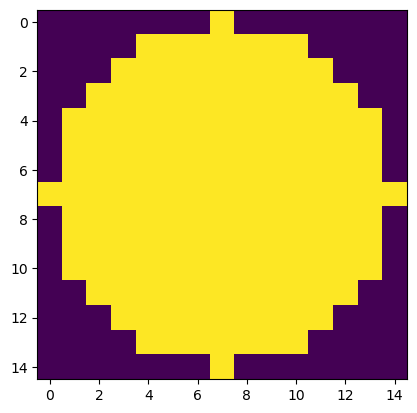

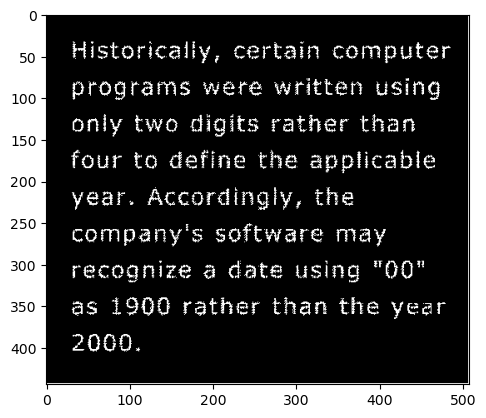

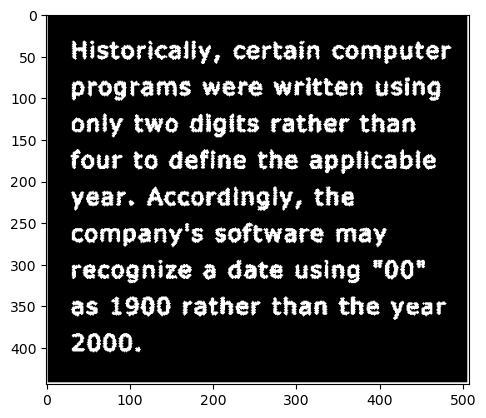

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

# Finestra binaria "circolare"
raggio = 7
b = morph.disk(raggio)
plt.figure()
plt.imshow(b)

# Enhancement di un testo a bassa risoluzione
x = io.imread("testo_fax.tif")
plt.figure()
plt.imshow(x, clim=[0,1], cmap="gray")

b = np.array([[0,1,0],[1,1,1],[0,1,0]], np.bool)

y = morph.binary_dilation(x, b)

plt.figure()
plt.imshow(y, clim=[0,1], cmap="gray")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

# Enhancement di un testo a bassa risoluzione
x = io.imread("")
plt.figure()
plt.imshow(x, clim=[0,1], cmap="gray")

### Estrazione dei bordi

L'estrazione dei bordi è un'operazione morfologica su una mappa binaria. Se faccio l'erosione, ottengo una stessa forma più piccola. Posso fare la differenza tra l'immagine originale e la sua erosione ed ottengo dei bordi. 

#### Hit or Miss
Definito l'elemento strutturante, bisognerebbe definirne 2, uno dove voglio gli 1 e dove voglio gli 0. Basta fare 2 erosioni condizionando per bene l'immagine originale. Una volta trovate le due immagini, si fa la hand pixel a pixel che mi permette di capire dove trovo particolari pattern spefificatamente desiderati

Text(0.5, 1.0, 'Erosion + dilatation')

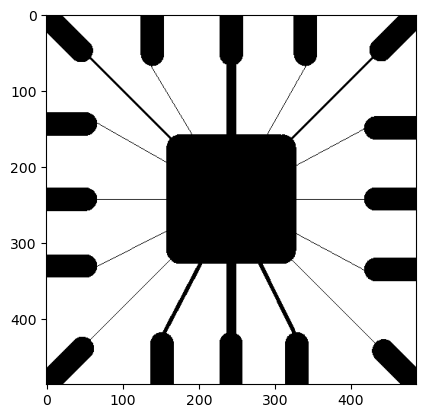

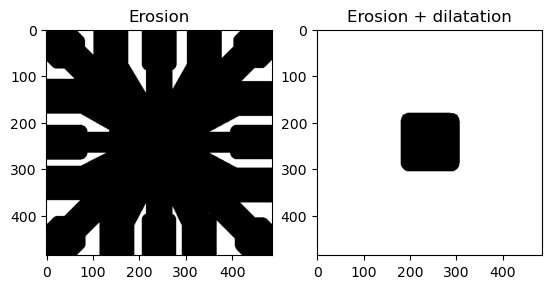

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

# Enhancement di un testo a bassa risoluzione
x = io.imread("circbw.tif")
plt.figure()
plt.imshow(x, clim=[0,1], cmap="gray")

s = morph.rectangle(45,45)
z = morph.binary_erosion(x, s)
y = morph.binary_dilation(x, s)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(z, clim=None, cmap="gray")
plt.title("Erosion")

plt.subplot(1,2,2)
plt.imshow(y, clim=None, cmap="gray")
plt.title("Erosion + dilatation")



Text(0.5, 1.0, 'Bordo')

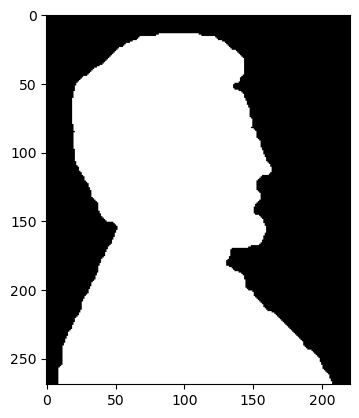

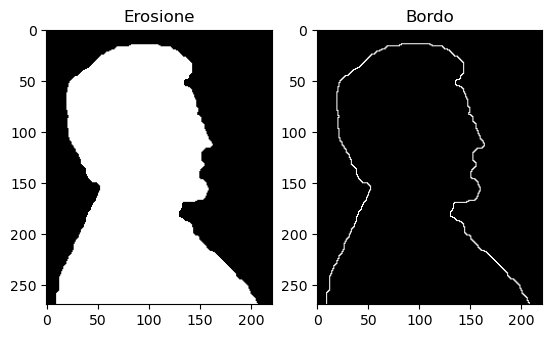

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

# Enhancement di un testo a bassa risoluzione
x = io.imread("Chianese.tif", plugin="pil") > 0
plt.figure()
plt.imshow(x, clim=[0,1], cmap="gray")

b = morph.rectangle(3,3)
z = morph.binary_erosion(x,b)
y = x ^ z

plt.figure()
plt.subplot(1,2,1)
plt.imshow(z, clim=[0,1], cmap="gray")
plt.title("Erosione")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,1], cmap="gray")
plt.title("Bordo")

/tmp/ipykernel_9125/1628131102.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b1 = np.array([[0,1,0],[1,1,1],[0,1,0]], np.bool)


Text(0.5, 1.0, 'Erosione + dilatazione')

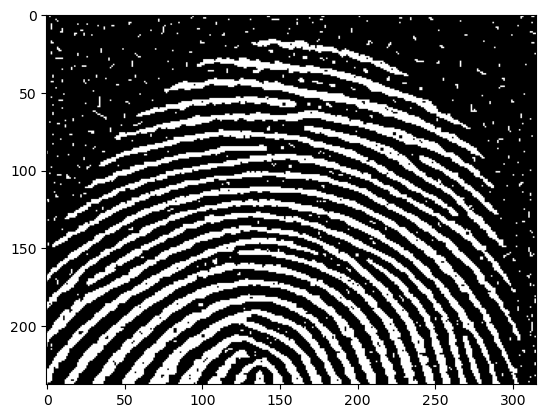

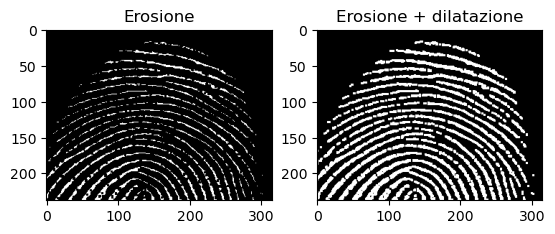

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

# Enhancement di un testo a bassa risoluzione
x = io.imread("impronta.tif", plugin="pil") > 0
plt.figure()
plt.imshow(x, clim=[0,1], cmap="gray")

b1 = np.array([[0,1,0],[1,1,1],[0,1,0]], np.bool)
z = morph.binary_erosion(x, b)

y = morph.binary_dilation(z,b)


plt.figure("Filtro a croce")
plt.subplot(1,2,1)
plt.imshow(z, clim=[0,1], cmap="gray")
plt.title("Erosione")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,1], cmap="gray")
plt.title("Erosione + dilatazione")

/tmp/ipykernel_9125/583993312.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b1 = np.array([[1,1,1],[1,1,1],[1,1,1]], np.bool)


Text(0.5, 1.0, 'Erosione + dilatazione')

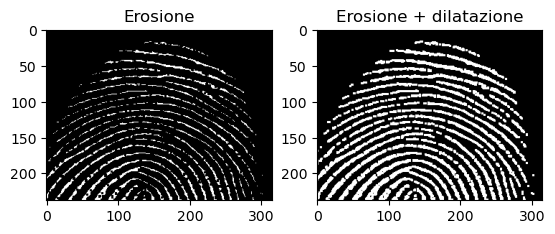

In [ ]:

b1 = np.array([[1,1,1],[1,1,1],[1,1,1]], np.bool)
z = morph.binary_erosion(x, b)

y = morph.binary_dilation(z,b)


plt.figure("Filtro a croce")
plt.subplot(1,2,1)
plt.imshow(z, clim=[0,1], cmap="gray")
plt.title("Erosione")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,1], cmap="gray")
plt.title("Erosione + dilatazione")

Text(0.5, 1.0, 'Skeleton')

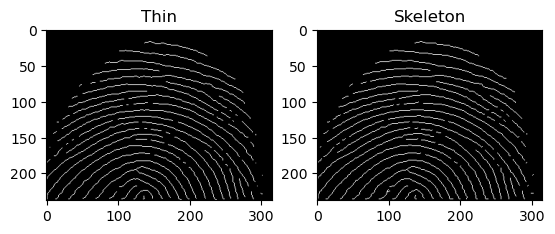

In [45]:
b = morph.rectangle(3,3)

z = morph.binary_opening(x,b)
y = morph.binary_closing(z,b)
z = morph.binary_opening(y,b)
y = morph.binary_closing(z,b)

y1 = morph.thin(y)
y2 = morph.skeletonize(y)

plt.figure("Filtro a croce")
plt.subplot(1,2,1)
plt.imshow(y1, clim=[0,1], cmap="gray")
plt.title("Thin")
plt.subplot(1,2,2)
plt.imshow(y2, clim=[0,1], cmap="gray")
plt.title("Skeleton")

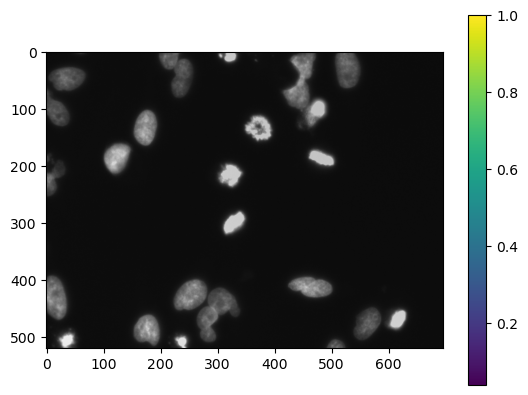

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
import skimage.morphology as morph

# Enhancement di un testo a bassa risoluzione
x = io.imread("cells.png")/255

plt.figure()
plt.imshow(x)

# b1 = morph.rectangle(3,3)
# y = morph.binary_erosion(x,b1)

# plt.figure()
# plt.imshow(y, clim=[0,1], cmap="gray")